In [5]:
# importing required libraries 
# %matplotlib notebook
# %pylab

import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt 
import glob
import os
import numpy as np 
import csv
import pandas as pd 
from pylab import *

In [6]:
def extract_eps(file_name):
    dataset_name, epsilon, e1, e2, exp_num = os.path.splitext(os.path.basename(file_name))[0].split('_')
    return epsilon, e1, e2
    

In [7]:
def get_heatmap_data(csv_files,x, metric):
     
    # Initialize an empty DataFrame to store concatenated data
    all_data = pd.DataFrame()

    # Iterate through each CSV file
    for csv_file in csv_files:
        # Load the CSV file
        df = pd.read_csv(csv_file)

        # Extract information from the file name
        epsilon, e1, e2 = extract_eps(csv_file)
        eps = e1 if x == 'e1' else e2
        # Convert relevant columns to appropriate data types
        df['N'] = df['N'].astype(int)
        df[x] = eps
        df[metric] = df[metric].astype(float)

        # Create a new column for dataset_name
#         df['Dataset'] = dataset_name

        # Concatenate the data
        all_data = pd.concat([all_data, df])

    # Create a pivot table for the heatmap
    heatmap_data = all_data.pivot_table(index='N', columns=x, values=metric, aggfunc='mean')
    return heatmap_data

#     # Create heatmap using Seaborn
#     plt.figure(figsize=(12, 8))
#     sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt=".3f", linewidths=.5, cbar_kws={'label': 'Mean NMI'})

#     # Set labels and title
#     plt.xlabel(x)
#     plt.ylabel('N')
#     plt.title(metric)

#     # Show the plot
#     plt.show()


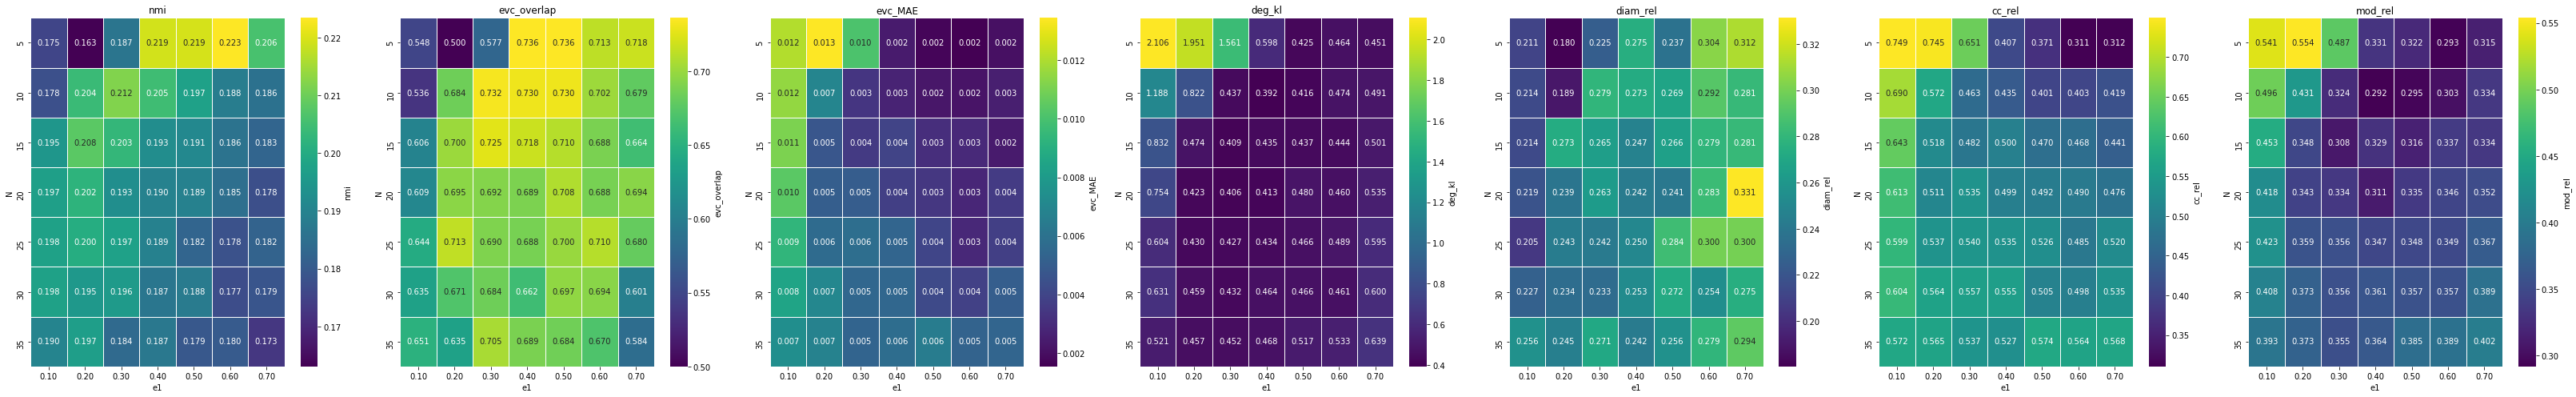

In [8]:
# Specify the folder path and file pattern (e.g., "*.csv" for all CSV files)
folder_path = 'result2/'  # Replace 'your_folder_path' with the actual folder path
file_pattern = '*.csv'

# Get a list of file paths
csv_files = glob.glob(f"{folder_path}/{file_pattern}")
metrics = ['nmi','evc_overlap','evc_MAE','deg_kl', \
    'diam_rel','cc_rel','mod_rel']

fig, axes = plt.subplots(1, len(metrics), figsize=(45, 7))

for i, m in enumerate(metrics): 
    data = get_heatmap_data(csv_files, 'e1', m)
    sns.heatmap(data, cmap='viridis', annot=True, fmt=".3f", linewidths=.5, cbar_kws={'label': m}, ax=axes[i])
    axes[i].set_title(m)

plt.tight_layout()
plt.show()

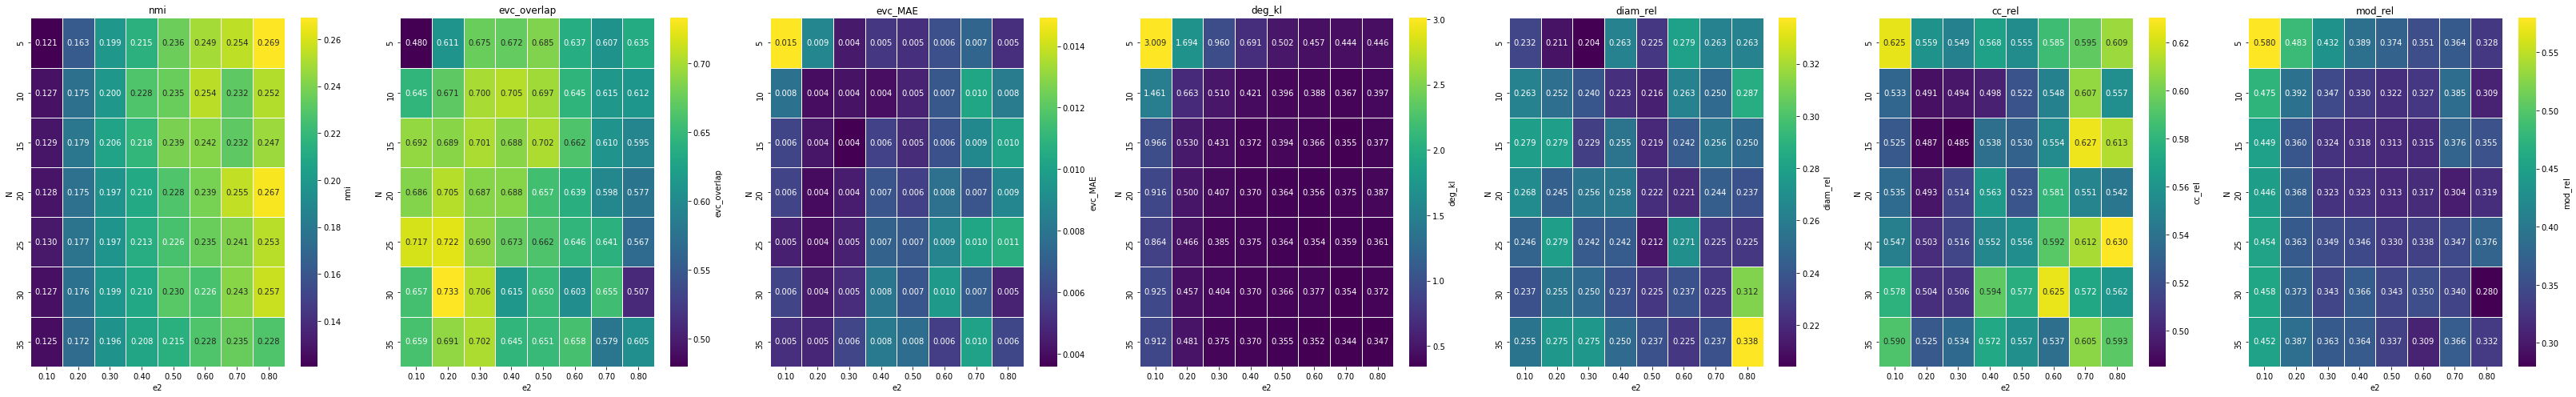

In [9]:
fig, axes = plt.subplots(1, len(metrics), figsize=(45, 7))

for i, m in enumerate(metrics): 
    data = get_heatmap_data(csv_files, 'e2', m)
    sns.heatmap(data, cmap='viridis', annot=True, fmt=".3f", linewidths=.5, cbar_kws={'label': m}, ax=axes[i])
    axes[i].set_title(m)

plt.tight_layout()
plt.show()

In [10]:
def parse_csvs(folder):
    file_pattern = '*.csv'

    # Get a list of file paths
    csv_files = glob.glob(f"{folder}/{file_pattern}")
    metrics = ['nmi','evc_overlap','evc_MAE','deg_kl', \
        'diam_rel','cc_rel','mod_rel']
    data = [
    ['n', 'e1', 'e2', 'nmi','evc_overlap','evc_MAE','deg_kl', \
        'diam_rel','cc_rel','mod_rel']]
    for file in csv_files:
        df = pd.read_csv(file)
        epsilon, e1, e2 = extract_eps(file)
        for i in range(1, 8):
            # Filter rows where N is equal to 5
            filtered_data = df[df['N'] == i*5]

            # Calculate the column-wise averages
            averages = filtered_data.iloc[:, 3:].mean().to_numpy()
            final_array = [i*5, e1, e2]+averages.tolist()
            data.append(final_array)
            
            
            
    with open('result2/aggregated.csv', 'w', newline='') as csvfile:
        csvwriter = csv.writer(csvfile)
        csvwriter.writerows(data)
    



        
        



In [11]:
parse_csvs("result2")

In [26]:
  
def plot_3d(metric):

    # reading a dummy dataset 
    dataset = pd.read_csv("result2/aggregated.csv") 
    n = dataset["n"].tolist() 
    e1 = dataset["e1"].tolist() 
    e2 = dataset["e2"].tolist() 

    colo = dataset[metric].tolist() 
    
    
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(e1, e2, n, c=colo, cmap='viridis', marker='o')
    ax.set_xlabel('e1')
    ax.set_ylabel('e2')
    ax.set_zlabel('n')

    # Adding a colorbar
    cbar = plt.colorbar(scatter)
    cbar.set_label(metric)

    plt.title(metric)
    plt.show()

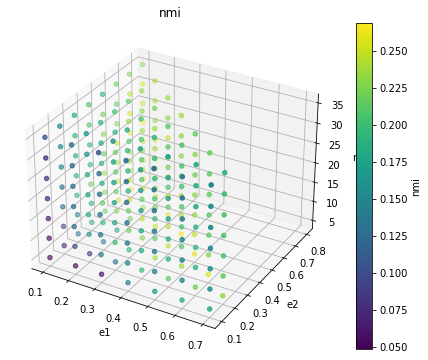

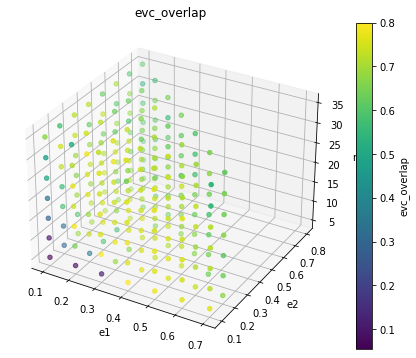

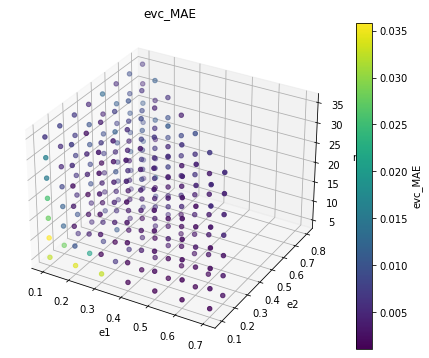

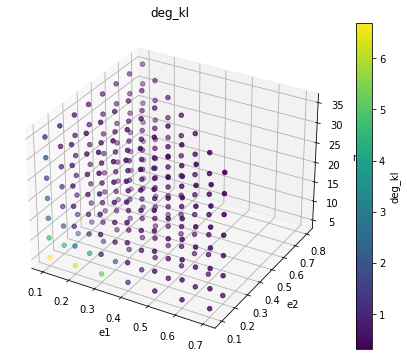

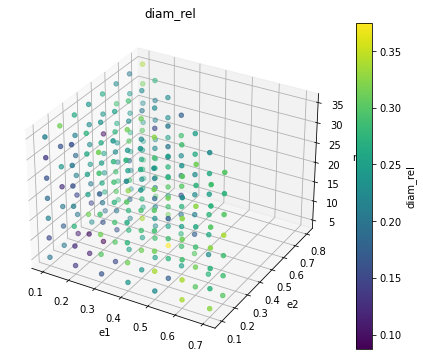

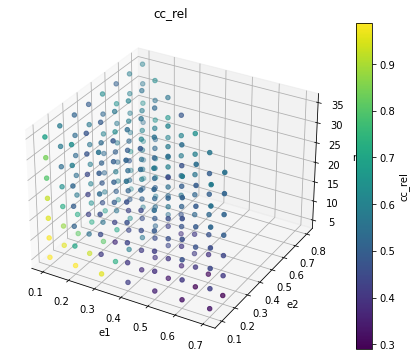

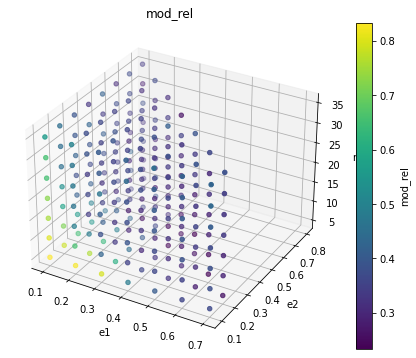

In [28]:
for m in metrics:
    plot_3d(m)